**Библиотеки**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## 

**Входные данные**

In [25]:
class Simulation:
    def __init__(self, N=7777, I=700, R=0, a=0.007, b=0.003, crit_I=90):
        # Исходные параметры
        self.N = N  # Общее количество особей
        self.I = I  # Инфицированные
        self.R = R  # С иммунитетом
        self.S = N - I - R  # Здоровые, восприимчивые к болезни
        self.a = a  # Коэффициент заболевания
        self.b = b  # Коэффициент выздоровления
        self.crit_I = crit_I  # Критическое значение зараженных
        self.t = 0  # Время
        # Списки для записи истории
        self.count_I = []
        self.count_R = []
        self.count_S = []

    def plot_results(self, include_S=False):
        plt.figure(dpi=100)
        
        # Данные времени
        time_range = np.arange(0, len(self.count_I), 1)
        
        # Строим график для I и R
        plt.plot(time_range, self.count_I, lw=2, label='I', color='red')
        plt.plot(time_range, self.count_R, lw=2, label='R', color='green')
        
        # Если нужно, строим график для S
        if include_S and self.count_S:
            plt.plot(time_range, self.count_S, lw=2, label='S', color='blue')
        
        # Общие настройки графика
        plt.grid()
        plt.legend()
        plt.show()

**I не превышает критического значения. Идет счетчик по дням, в теле цикла условия из дифф. ур. модели SIR.**

In [26]:
class Scenario1(Simulation):
    def I_lower_than_I_crit(self,max_steps=10000):
        while self.t != max_steps and int(self.I) != 0:
            self.I -= self.I * self.b
            self.R += self.I * self.b
            # Запись значений
            self.count_I.append(self.I)
            self.count_R.append(self.R)
            self.t += 1
        print("Цикл 1 завершен на шаге:", self.t)

**Графическая интерпритация**

Цикл 1 завершен на шаге: 2181


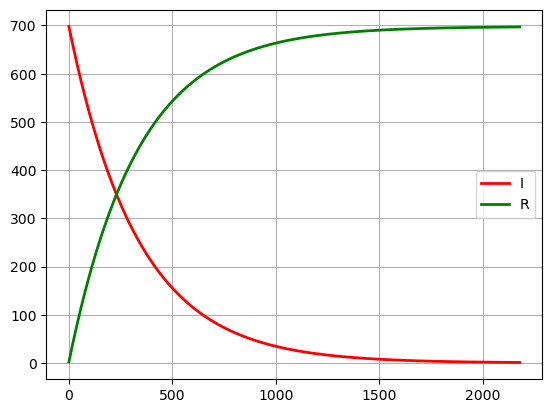

In [27]:
scenario1 = Scenario1()
scenario1.I_lower_than_I_crit()
scenario1.plot_results(include_S=False)

**Теперь случай, когда I превышает критическое значение.**

In [ ]:
class Scenario2(Simulation):
    
    def I_higher_than_I_crit(self,max_steps=10000):
        while self.t != 10000 and int(self.I) != 0:
            self.S -= self.a*self.S
            self.I += self.a*self.S - self.I*self.b
            self.R += self.b*self.I
                
            self.count_S.append(self.S)
            self.count_I.append(self.I)
            self.count_R.append(self.R)
            
            self.t += 1
        print("Цикл 2 завершен на шаге:", self.t)

Цикл 1 завершен на шаге: 3153


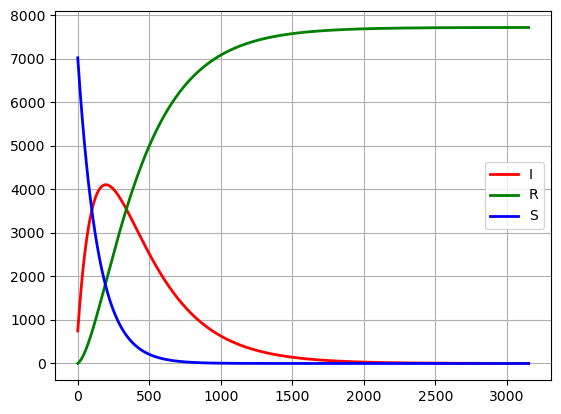

In [31]:
scenario2 = Scenario2()
scenario2.I_higher_than_I_crit()
scenario2.plot_results(include_S=True)

In [32]:
class GeneralScenario(Simulation):
    def run_sumulation(self,max_steps=10000):
        while self.t != 10000 and int(self.I) != 0:
            if self.I > self.crit_I:
                self.S -= self.a * self.S
                self.I += self.a * self.S - self.I * self.b 
                self.R += self.I * self.b
            else:
                self.I -= self.I * self.b
                self.R += self.I * self.b

            self.count_S.append(self.S)
            self.count_I.append(self.I)
            self.count_R.append(self.R)

            self.t += 1
        print("Общий цикл завершен на шаге:", self.t)

Общий цикл завершен на шаге: 3153


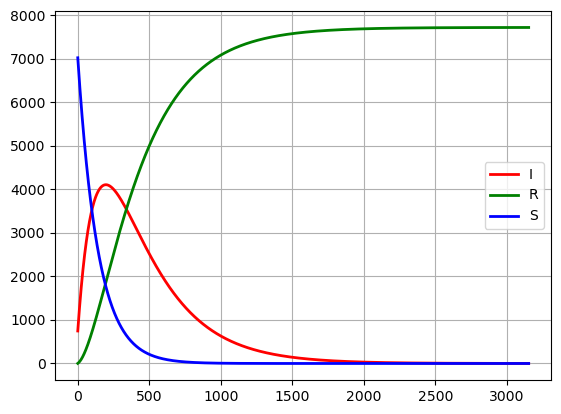

In [33]:
general = GeneralScenario()
general.run_sumulation()
general.plot_results(include_S=True)

In [ ]:
class RungeKuttaScenario(Simulation):
    def run_simulation(self, t_end=10000, dt=1):
        # Время окончания и шаг времени
        self.dt = dt
        self.t_end = t_end

        # Создаем списки для сохранения значений
        self.time = []
        
        while self.t < self.t_end and int(self.I) != 0:
            if self.I > self.crit_I:
                dS1 = self.dt * self.a * self.S
                dI1 = self.dt * (self.a * self.S - self.I * self.b)
                dR1 = self.dt * (self.I * self.b)

                dS2 = self.dt * self.a * (self.S + dS1 / 2)
                dI2 = self.dt * (self.a * (self.S + dS1 / 2) - (self.I + dI1 / 2) * self.b)
                dR2 = self.dt * ((self.I + dI1 / 2) * self.b)

                dS3 = self.dt * self.a * (self.S + dS2 / 2)
                dI3 = self.dt * (self.a * (self.S + dS2 / 2) - (self.I + dI2 / 2) * self.b)
                dR3 = self.dt * ((self.I + dI2 / 2) * self.b)

                dS4 = self.dt * self.a * (self.S + dS3)
                dI4 = self.dt * (self.a * (self.S + dS3) - (self.I + dI3) * self.b)
                dR4 = self.dt * ((self.I + dI3) * self.b)
            else:
                dS1 = 0
                dI1 = self.dt * (-self.I * self.b)
                dR1 = self.dt * (self.I * self.b)

                dS2 = 0
                dI2 = self.dt * (- (self.I + dI1 / 2) * self.b)
                dR2 = self.dt * ((self.I + dI1 / 2) * self.b)

                dS3 = 0
                dI3 = self.dt * (- (self.I + dI2 / 2) * self.b)
                dR3 = self.dt * ((self.I + dI2 / 2) * self.b)

                dS4 = 0
                dI4 = self.dt * (- (self.I + dI3) * self.b)
                dR4 = self.dt * ((self.I + dI3) * self.b)

            self.S -= (dS1 + 2 * dS2 + 2 * dS3 + dS4) / 6
            self.I += (dI1 + 2 * dI2 + 2 * dI3 + dI4) / 6
            self.R += (dR1 + 2 * dR2 + 2 * dR3 + dR4) / 6

            self.time.append(self.t)
            self.count_S.append(self.S)
            self.count_I.append(self.I)
            self.count_R.append(self.R)

            self.t += self.dt

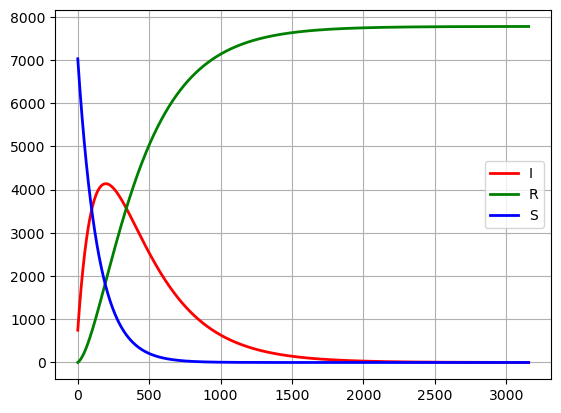

In [35]:
rungekutta = RungeKuttaScenario()
rungekutta.run_simulation()
rungekutta.plot_results(include_S=True)

In [16]:
import numpy as np
a = (np.e)**0.5
print(1/a)

0.6065306597126334


In [23]:
import scipy.stats as st
# Параметры распределения Пуассона
λ = 2.5  # среднее значение
m = 0    # количество событий, для которого ищем вероятность

# Вычисляем вероятность того, что произойдет ровно m событий
probability = st.poisson.pmf(m, λ)
print(probability)

0.0820849986238988


In [20]:
n = 0.07581633246407919 + 0.012636055410679865
print(n)

0.08845238787475906


In [21]:
m = 2
sum = 0
while m<=3:
    probability = st.poisson.pmf(m,λ)
    m+=1
    sum += probability

    print(sum)

0.07581633246407919
0.08845238787475906


In [27]:
import numpy as np

# Определим матрицу интенсивностей переходов
Q = np.array([
    [-5, 1, 0, 4],
    [3, -6, 3, 0],
    [0, 1, -4, 3],
    [2, 0, 2, -4]
])

# Добавляем условие нормировки, чтобы сумма вероятностей была равна 1
Q = np.vstack([Q.T, np.ones(Q.shape[0])])
b = np.array([0, 0, 0, 0, 1])

# Решаем систему линейных уравнений
pi = np.linalg.lstsq(Q, b, rcond=None)[0]

print("Стационарное распределение:", pi)
a = pi*np.array([0,3,3*np.sqrt(2),3])
print(a)

Стационарное распределение: [0.21917808 0.08219178 0.2739726  0.42465753]
[0.         0.24657534 1.16236731 1.2739726 ]
